### Name : Ruchita Amit Shaha
### Course : Data Science
### Batch : August 2022
### Title : Project 1 - To find the Defaulters

### (1)Import the packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
cd = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv")

In [3]:
cd.shape

(1000, 17)

In [4]:
cd.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
586,< 0 DM,9,critical,car,2799,< 100 DM,1 - 4 years,2,2,36,none,rent,2,skilled,2,no,no
106,unknown,18,very good,car,6458,< 100 DM,> 7 years,2,4,39,bank,own,2,management,2,yes,yes
71,unknown,7,critical,furniture/appliances,730,unknown,> 7 years,4,2,46,none,rent,2,unskilled,1,yes,no
957,1 - 200 DM,9,critical,furniture/appliances,1154,< 100 DM,> 7 years,2,4,37,none,own,3,unskilled,1,no,no
623,< 0 DM,12,good,furniture/appliances,1858,< 100 DM,< 1 year,4,1,22,none,rent,1,skilled,1,no,no
213,> 200 DM,30,poor,business,1908,< 100 DM,> 7 years,4,4,66,none,own,1,management,1,yes,yes
482,< 0 DM,30,good,furniture/appliances,3622,> 1000 DM,> 7 years,4,4,57,none,rent,2,skilled,1,yes,no
837,unknown,4,good,furniture/appliances,601,< 100 DM,< 1 year,1,3,23,none,rent,1,unskilled,2,no,no
631,< 0 DM,18,very good,furniture/appliances,1553,< 100 DM,1 - 4 years,4,3,44,bank,own,1,skilled,1,no,yes
904,unknown,24,good,furniture/appliances,1278,< 100 DM,> 7 years,4,1,36,none,own,1,management,1,yes,no


In [5]:
cd.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [7]:
cd.describe(include='all')

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,6,NaN,5,5,NaN,NaN,NaN,3,3,NaN,4,NaN,2,2
top,unknown,NaN,good,furniture/appliances,NaN,< 100 DM,1 - 4 years,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no,no
freq,394,NaN,530,473,NaN,603,339,NaN,NaN,NaN,814,713,NaN,630,NaN,596,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [8]:
cd.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

### (2) EDA

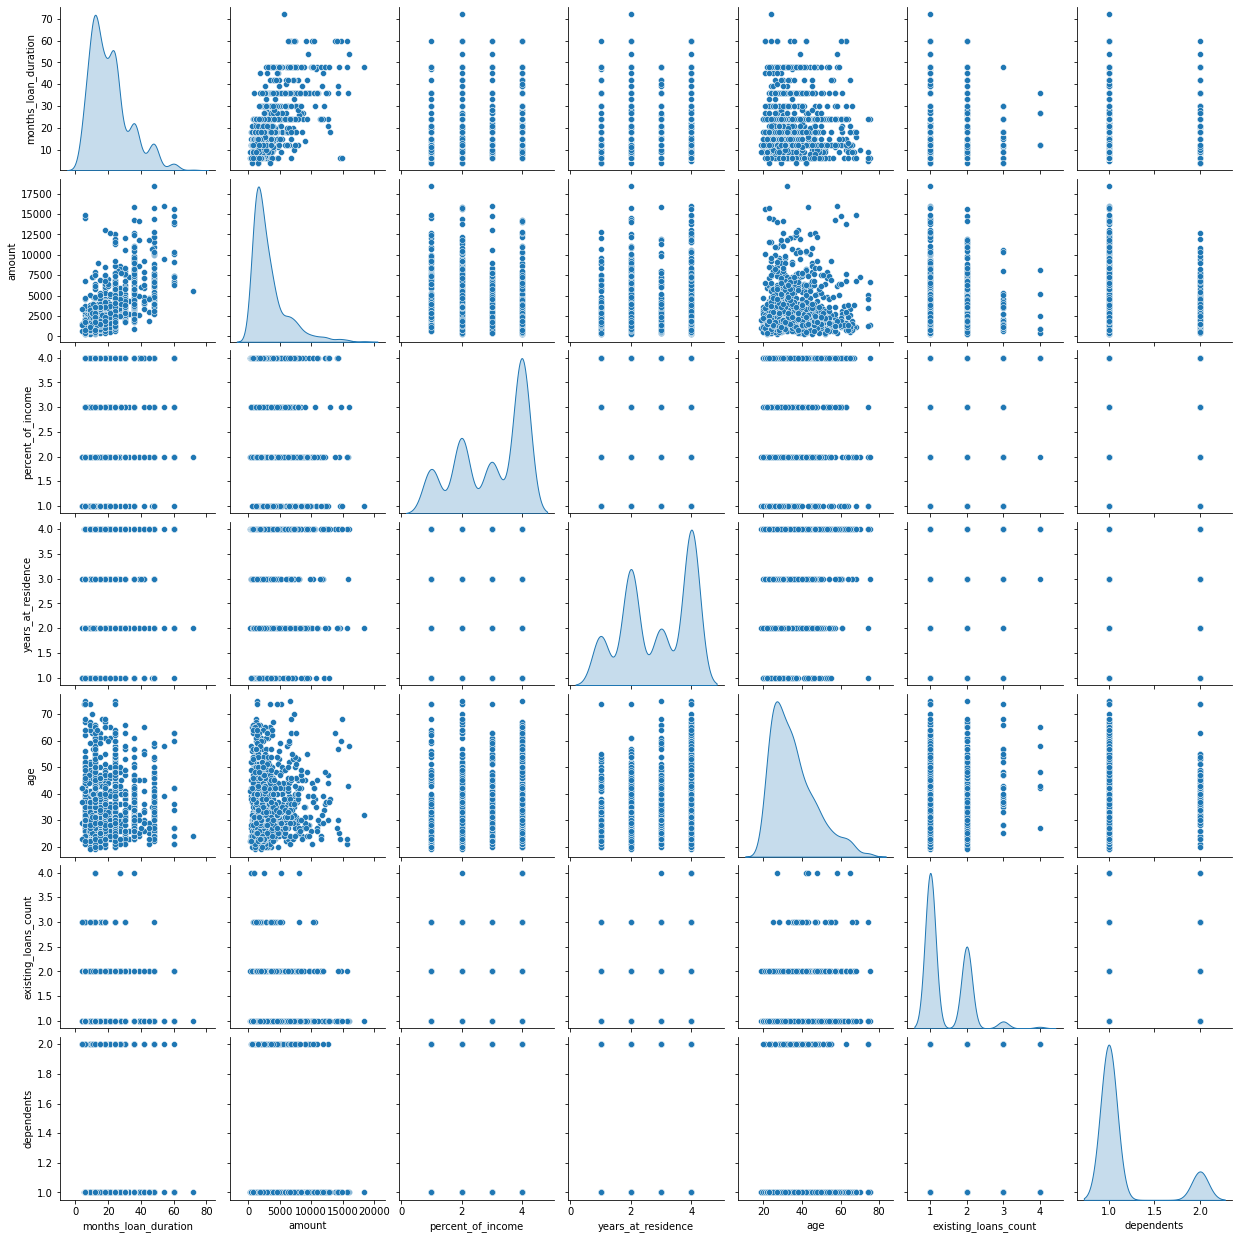

In [9]:
sns.pairplot(cd, diag_kind='kde')

<AxesSubplot:xlabel='credit_history', ylabel='count'>

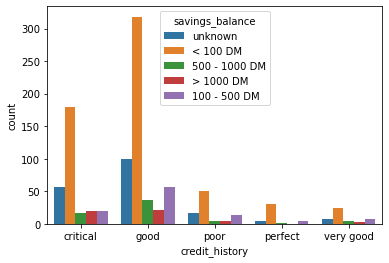

In [10]:
sns.countplot(x="credit_history", hue="savings_balance", data=cd)

In [ ]:
''' The graph above shows the analysis of the customer's credit history
based on the savings_balance, i.e, 
1) very few people have little perfect or very good credit history with 
   maximum savings of < 100 DM .
2) Major sector of the customer population has critical/ good
   credit history with the maximum savings of < 100 DM or in 
   the range of 100-500 DM.'''

array([[<AxesSubplot:title={'center':'months_loan_duration'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'percent_of_income'}>],
       [<AxesSubplot:title={'center':'years_at_residence'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'existing_loans_count'}>],
       [<AxesSubplot:title={'center':'dependents'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

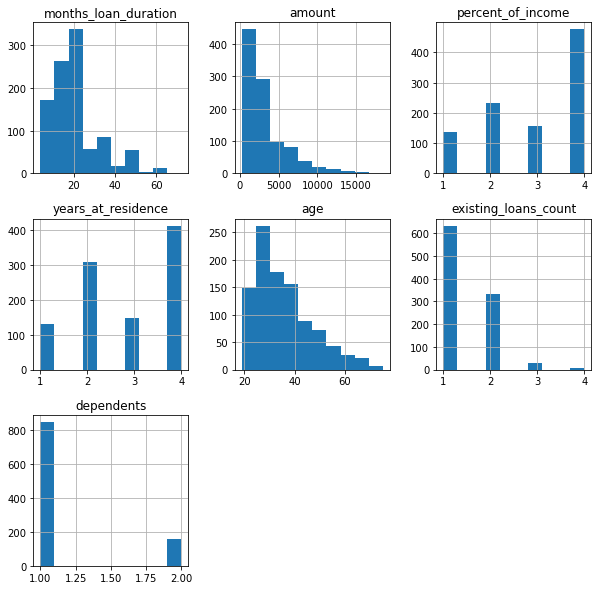

In [11]:
cd.hist(figsize=(10,10))

<AxesSubplot:xlabel='purpose', ylabel='amount'>

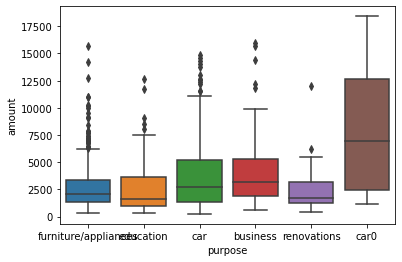

In [12]:
sns.boxplot(x="purpose", y ="amount", data=cd)

'''here, how much amount is spent for what purpose is displayed;
   maximum for car0 & minimum for renovations.'''

<AxesSubplot:xlabel='purpose', ylabel='age'>

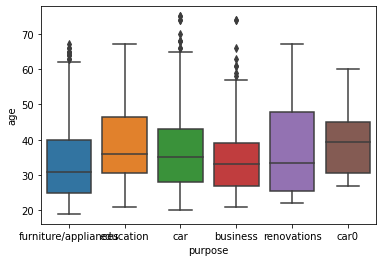

In [13]:
sns.boxplot(x="purpose", y ="age", data=cd)

'''In this, how age vise expendible priorities vary is shown below;
   where 25-38 years aged people spend on renovations & 
   there is moderate ages around 25-45 spending on furniture, car,
   business and other necessities.'''

<AxesSubplot:xlabel='job', ylabel='months_loan_duration'>

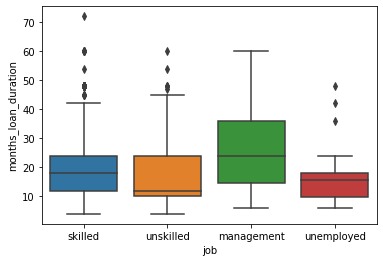

In [14]:
sns.boxplot(x="job", y ="months_loan_duration", data=cd)

'''This plot explains, how the job-type makes dependancy with 
   the loan_duration;
   those with management sector acquire the loans for large number
   of days & those who are unemployed predicate it within the least time.'''

In [15]:
pd.pivot_table(cd, 'amount', index=['job'], columns=['age'])

age,19,20,21,22,23,24,25,26,27,28,...,62,63,64,65,66,67,68,70,74,75
job,,,,,,,,,,,,,,,,,,,,,
management,NaN,1107.000000,NaN,NaN,6760.500000,7408.000000,8065.000000,5727.000000,6867.200000,4626.500000,...,NaN,13756.0,NaN,NaN,1717.0,1199.0,14896.0,7308.0,4827.5,3994.5
skilled,1980.0,2177.666667,3940.636364,2355.0,2823.133333,3398.129032,3285.033333,2780.916667,3254.828571,2758.064516,...,2547.5,3769.0,1175.333333,1367.0,NaN,2520.5,6761.0,NaN,NaN,NaN
unemployed,NaN,NaN,NaN,NaN,6555.000000,7472.000000,2473.000000,1193.500000,729.500000,NaN,...,NaN,NaN,NaN,2246.0,1480.0,NaN,1175.0,NaN,1299.0,NaN
unskilled,983.0,2718.000000,3281.333333,698.5,1984.692308,3080.181818,2299.333333,2180.285714,2578.444444,2155.500000,...,NaN,1655.0,3108.000000,NaN,778.0,NaN,NaN,NaN,3448.0,NaN


In [16]:
pd.pivot_table(cd, 'existing_loans_count', index=['credit_history','employment_duration'],
              columns=['months_loan_duration'])

months_loan_duration                  4    5         6    7    8         9   \
credit_history employment_duration                                            
critical       1 - 4 years           NaN  NaN  1.909091  NaN  NaN  2.200000   
               4 - 7 years          2.25  NaN  1.833333  NaN  2.0  1.000000   
               < 1 year              NaN  NaN  1.500000  NaN  NaN       NaN   
               > 7 years             NaN  NaN  2.000000  2.0  2.0  2.166667   
               unemployed            NaN  NaN  3.000000  NaN  NaN  1.000000   
good           1 - 4 years           NaN  NaN  1.000000  1.0  1.0  1.000000   
               4 - 7 years           NaN  1.0  1.000000  NaN  1.0  1.400000   
               < 1 year             1.00  NaN  1.000000  1.0  1.0  1.142857   
               > 7 years             NaN  NaN  1.000000  NaN  NaN  1.142857   
               unemployed            NaN  NaN  1.000000  NaN  NaN       NaN   
perfect        1 - 4 years           NaN  NaN  1.000000  NaN  NaN       NaN   
               4 - 7 years           NaN  NaN       NaN  NaN  NaN       NaN   
               < 1 year              NaN  NaN       NaN  NaN  NaN  2.000000   
               > 7 years             NaN  NaN  1.000000  NaN  NaN       NaN   
               unemployed            NaN  NaN       NaN  NaN  NaN       NaN   
poor           1 - 4 years           NaN  NaN  1.500000  NaN  NaN       NaN   
               4 - 7 years           NaN  NaN       NaN  NaN  NaN       NaN   
               < 1 year              NaN  NaN  1.000000  NaN  NaN       NaN   
               > 7 years             NaN  NaN  2.000000  1.0  NaN       NaN   
               unemployed            NaN  NaN  1.500000  NaN  NaN       NaN   
very good      1 - 4 years           NaN  NaN  1.000000  NaN  NaN       NaN   
               4 - 7 years           NaN  NaN       NaN  NaN  NaN  1.000000   
               < 1 year              NaN  NaN  1.000000  NaN  NaN       NaN   
               > 7 years             NaN  NaN  1.000000  NaN  NaN  1.000000   
               unemployed            NaN  NaN       NaN  NaN  NaN       NaN   

months_loan_duration                 10   11        12   13  ...        36  \
credit_history employment_duration                           ...             
critical       1 - 4 years          2.0  2.0  1.800000  NaN  ...  1.857143   
               4 - 7 years          2.0  NaN  1.727273  NaN  ...  2.000000   
               < 1 year             2.0  2.0  1.600000  2.0  ...  2.000000   
               > 7 years            2.0  NaN  1.956522  NaN  ...  1.714286   
               unemployed           NaN  3.0  2.000000  NaN  ...       NaN   
good           1 - 4 years          1.0  NaN  1.065217  NaN  ...  1.000000   
               4 - 7 years          1.0  NaN  1.117647  NaN  ...  1.333333   
               < 1 year             1.0  1.0  1.150000  1.0  ...  1.000000   
               > 7 years            1.0  1.0  1.250000  NaN  ...  1.083333   
               unemployed           1.0  NaN  1.000000  1.0  ...  1.333333   
perfect        1 - 4 years          NaN  NaN  1.666667  NaN  ...  1.500000   
               4 - 7 years          NaN  NaN  2.000000  NaN  ...       NaN   
               < 1 year             NaN  NaN  2.000000  NaN  ...       NaN   
               > 7 years            NaN  NaN  2.000000  NaN  ...  1.000000   
               unemployed           NaN  NaN       NaN  NaN  ...       NaN   
poor           1 - 4 years          NaN  NaN  1.750000  NaN  ...  1.600000   
               4 - 7 years          NaN  1.0       NaN  NaN  ...  1.750000   
               < 1 year             NaN  NaN       NaN  NaN  ...  2.000000   
               > 7 years            NaN  NaN  2.000000  NaN  ...  2.250000   
               unemployed           NaN  NaN       NaN  NaN  ...       NaN   
very good      1 - 4 years          1.0  NaN  1.250000  NaN  ...       NaN   
               4 - 7 years          NaN  NaN       NaN  NaN  ...       N

In [17]:
corr = cd.corr()
corr

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
percent_of_income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
years_at_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_loans_count,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


<AxesSubplot:>

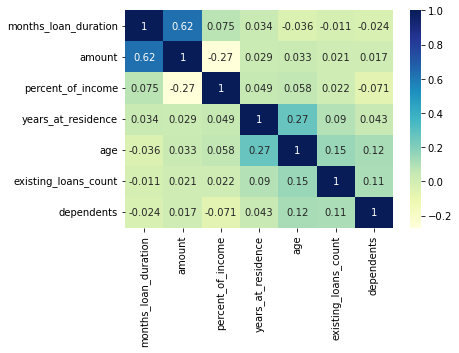

In [18]:
# Correlation before scaling

sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [19]:
# ONE HOT ENCODING

dummies = pd.get_dummies(cd[['checking_balance','credit_history','purpose','savings_balance',
                            'employment_duration','other_credit','housing','job','phone']] ,
        columns = ['checking_balance','credit_history','purpose','savings_balance',
                   'employment_duration','other_credit','housing','job','phone'])
dummies.head()

,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [20]:
columns = ['checking_balance','credit_history','purpose','savings_balance',
           'employment_duration','other_credit','housing','job','phone']
cd = pd.concat([cd, dummies], axis = 1)
cd.drop(columns, axis=1, inplace=True)
cd.sample(10)

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
454,24,4817,2,3,31,1,1,yes,0,1,...,0,0,1,0,0,1,0,0,0,1
432,6,1872,4,4,36,3,1,no,0,1,...,0,1,0,0,1,0,0,0,0,1
154,24,6967,4,4,36,1,1,no,1,0,...,0,0,0,1,1,0,0,0,0,1
624,18,2600,4,4,65,2,1,yes,0,1,...,0,1,0,0,0,1,0,0,1,0
841,21,2993,3,2,28,2,1,no,0,0,...,1,0,1,0,0,0,0,1,1,0
864,10,2210,2,2,25,1,1,yes,0,0,...,0,0,0,1,0,0,0,1,1,0
392,36,3249,2,4,39,1,2,no,0,1,...,0,1,0,0,1,0,0,0,0,1
481,24,1201,4,1,26,1,1,no,1,0,...,0,0,1,0,0,1,0,0,1,0
747,12,1274,3,1,37,1,1,yes,0,1,...,0,0,1,0,0,0,0,1,1,0
240,24,915,4,2,29,1,1,yes,0,1,...,0,0,1,0,0,1,0,0,1,0


In [21]:
cd.dtypes

months_loan_duration                int64
amount                              int64
percent_of_income                   int64
years_at_residence                  int64
age                                 int64
existing_loans_count                int64
dependents                          int64
default                            object
checking_balance_1 - 200 DM         uint8
checking_balance_< 0 DM             uint8
checking_balance_> 200 DM           uint8
checking_balance_unknown            uint8
credit_history_critical             uint8
credit_history_good                 uint8
credit_history_perfect              uint8
credit_history_poor                 uint8
credit_history_very good            uint8
purpose_business                    uint8
purpose_car                         uint8
purpose_car0                        uint8
purpose_education                   uint8
purpose_furniture/appliances        uint8
purpose_renovations                 uint8
savings_balance_100 - 500 DM      

In [22]:
# Check for duplicate data

duplicate = cd.duplicated()
print(duplicate.sum())

0


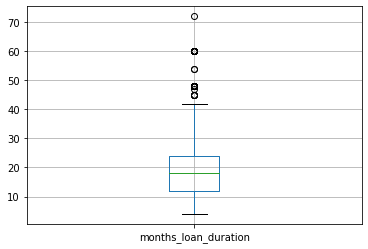

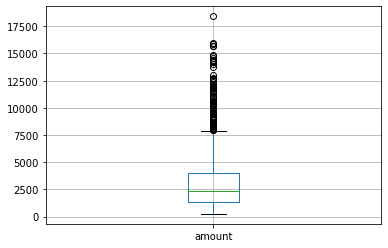

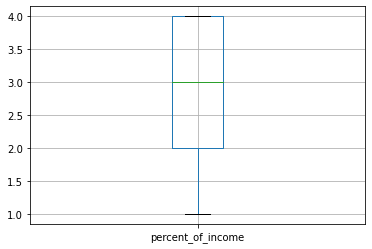

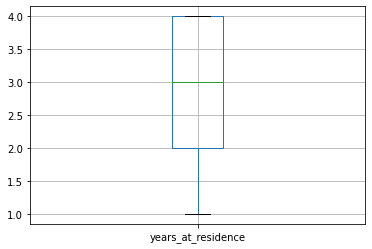

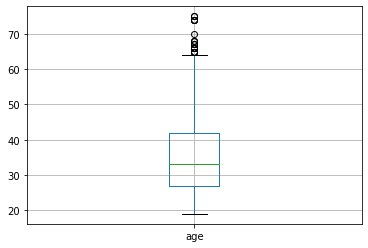

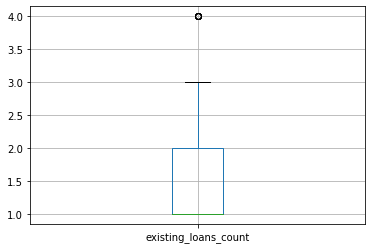

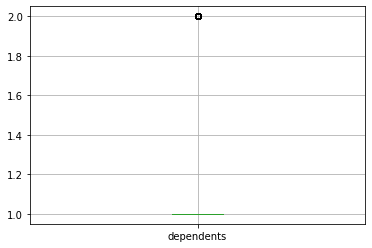

In [24]:
# Handling the Outliers

cd.boxplot(column = ['months_loan_duration'])
plt.show()
cd.boxplot(column = ['amount'])
plt.show()
cd.boxplot(column = ['percent_of_income'])
plt.show()
cd.boxplot(column = ['years_at_residence'])
plt.show()
cd.boxplot(column = ['age'])
plt.show()
cd.boxplot(column = ['existing_loans_count'])
plt.show()
cd.boxplot(column = ['dependents'])
plt.show()

In [25]:
# replace the outlier value with IQR

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [26]:
lower_range, upper_range = remove_outlier(cd['months_loan_duration'])
cd['months_loan_duration'] = np.where(cd['months_loan_duration']>upper_range,upper_range,
                           cd['months_loan_duration'])
cd['months_loan_duration'] = np.where(cd['months_loan_duration']<lower_range,lower_range,
                           cd['months_loan_duration'])

lower_range, upper_range = remove_outlier(cd['amount'])
cd['amount'] = np.where(cd['amount']>upper_range,upper_range,
                           cd['amount'])
cd['amount'] = np.where(cd['amount']<lower_range,lower_range,
                           cd['amount'])

lower_range, upper_range = remove_outlier(cd['percent_of_income'])
cd['percent_of_income'] = np.where(cd['percent_of_income']>upper_range,upper_range,
                           cd['percent_of_income'])
cd['percent_of_income'] = np.where(cd['percent_of_income']<lower_range,lower_range,
                           cd['percent_of_income'])

lower_range, upper_range = remove_outlier(cd['years_at_residence'])
cd['years_at_residence'] = np.where(cd['years_at_residence']>upper_range,upper_range,
                           cd['years_at_residence'])
cd['years_at_residence'] = np.where(cd['years_at_residence']<lower_range,lower_range,
                           cd['years_at_residence'])

lower_range, upper_range = remove_outlier(cd['age'])
cd['age'] = np.where(cd['age']>upper_range,upper_range,
                           cd['age'])
cd['age'] = np.where(cd['age']<lower_range,lower_range,
                           cd['age'])
                           

lower_range, upper_range = remove_outlier(cd['existing_loans_count'])
cd['existing_loans_count'] = np.where(cd['existing_loans_count']>upper_range,upper_range,
                           cd['existing_loans_count'])
cd['existing_loans_count'] = np.where(cd['existing_loans_count']<lower_range,lower_range,
                           cd['existing_loans_count'])

lower_range, upper_range = remove_outlier(cd['dependents'])
cd['dependents'] = np.where(cd['dependents']>upper_range,upper_range,
                           cd['dependents'])
cd['dependents'] = np.where(cd['dependents']<lower_range,lower_range,
                           cd['dependents'])

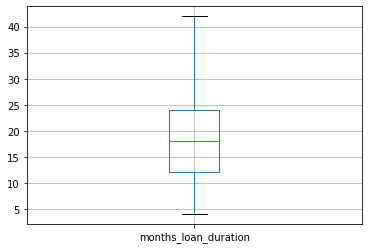

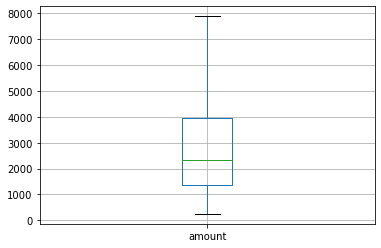

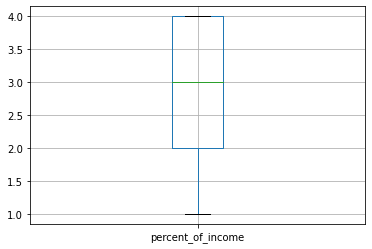

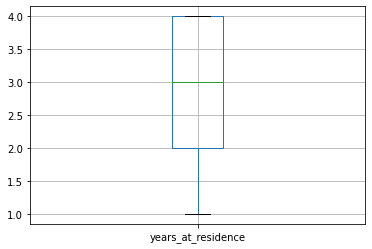

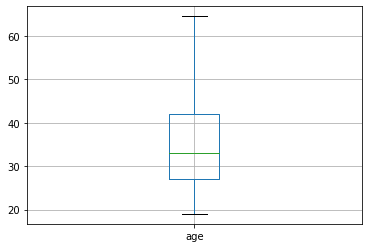

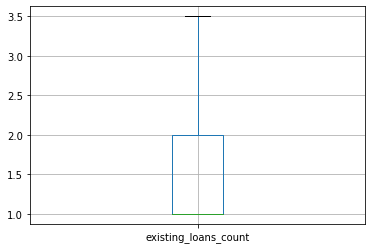

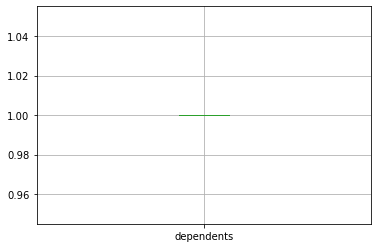

In [27]:
# After removing the outliers

cd.boxplot(column = ['months_loan_duration'])
plt.show()
cd.boxplot(column = ['amount'])
plt.show()
cd.boxplot(column = ['percent_of_income'])
plt.show()
cd.boxplot(column = ['years_at_residence'])
plt.show()
cd.boxplot(column = ['age'])
plt.show()
cd.boxplot(column = ['existing_loans_count'])
plt.show()
cd.boxplot(column = ['dependents'])
plt.show()

In [28]:
# Scaling

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [29]:
cd['months_loan_duration'] = std_scale.fit_transform(cd[['months_loan_duration']])
cd['amount'] = std_scale.fit_transform(cd[['amount']])
cd['percent_of_income'] = std_scale.fit_transform(cd[['percent_of_income']])
cd['years_at_residence'] = std_scale.fit_transform(cd[['years_at_residence']])
cd['age'] = std_scale.fit_transform(cd[['age']])
cd['existing_loans_count'] = std_scale.fit_transform(cd[['existing_loans_count']])
cd['dependents'] = std_scale.fit_transform(cd[['dependents']])

newc = cd.sample(10)
newc

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
914,0.348073,0.050273,0.918477,-0.765977,-0.401188,-0.714978,0.0,yes,0,1,...,0,0,0,1,0,1,0,0,0,1
271,-0.782952,-0.754376,0.024147,1.046987,0.139315,-0.714978,0.0,no,0,0,...,0,0,0,1,0,1,0,0,0,1
28,-1.254213,-0.290982,0.024147,-0.765977,-0.130937,-0.714978,0.0,no,1,0,...,0,0,1,0,0,1,0,0,1,0
718,0.348073,0.044326,0.024147,-0.765977,-0.401188,1.054770,0.0,no,0,0,...,0,0,1,0,0,1,0,0,0,1
835,-0.782952,-0.900759,0.918477,1.046987,1.130237,1.054770,0.0,yes,0,1,...,0,0,1,0,0,1,0,0,1,0
453,0.348073,-0.174333,0.918477,1.046987,-0.040853,-0.714978,0.0,no,0,0,...,0,0,1,0,1,0,0,0,0,1
865,-0.500196,-0.379727,-0.870183,1.046987,-1.392111,-0.714978,0.0,no,0,0,...,0,0,0,1,0,1,0,0,1,0
699,-0.500196,-0.524280,0.918477,1.046987,0.409566,-0.714978,0.0,no,0,0,...,0,0,0,1,1,0,0,0,0,1
978,0.348073,-0.234716,0.918477,1.046987,1.040153,1.054770,0.0,yes,0,0,...,0,0,1,0,0,0,0,1,1,0
561,0.348073,-0.688504,0.918477,1.046987,-1.031775,-0.714978,0.0,yes,0,1,...,0,0,0,1,0,0,0,1,1,0


<AxesSubplot:>

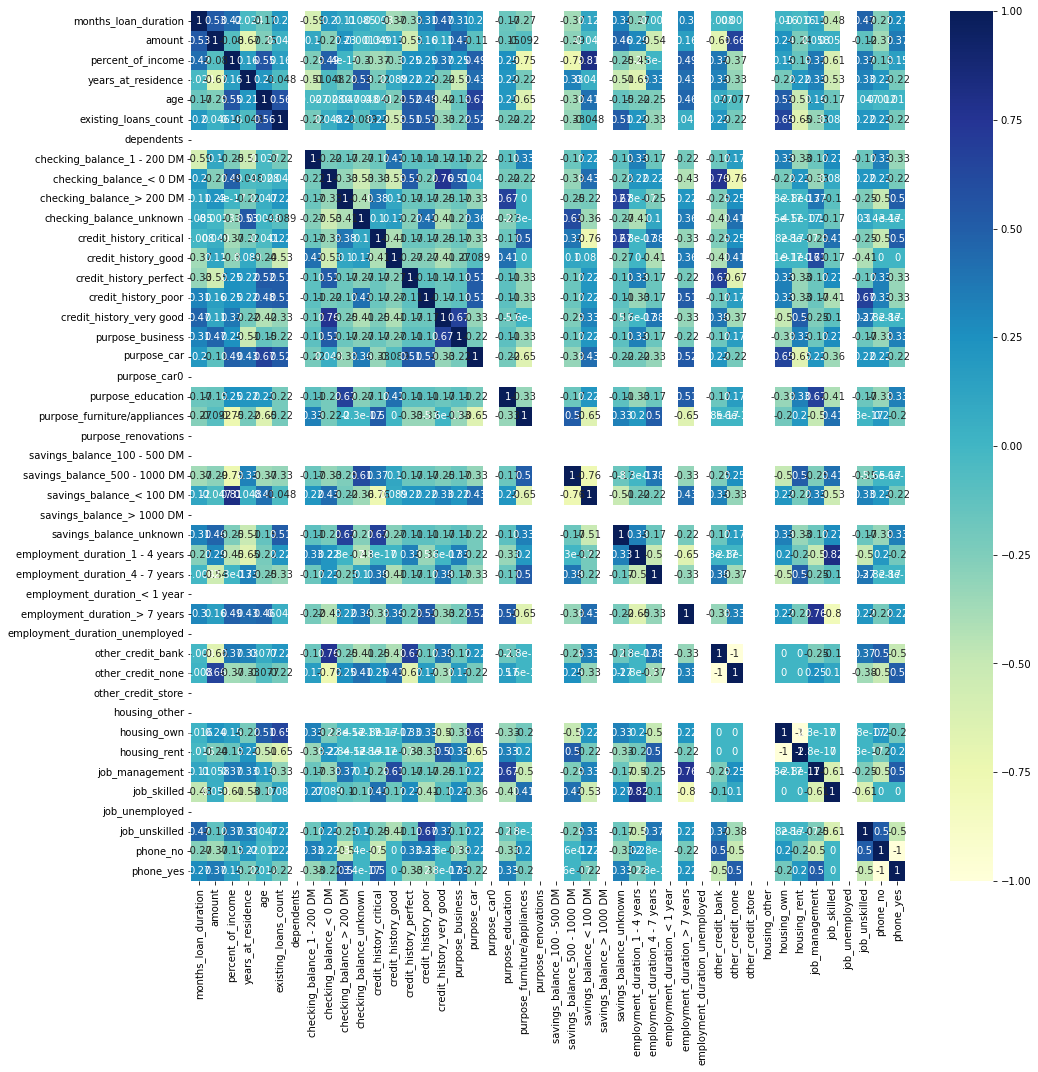

In [32]:
# Correlation after scaling

plt.subplots(figsize = (16,16))
sns.heatmap(newc.corr(), annot=True, cmap="YlGnBu")

### (3)Testing with Different Models

In [36]:
# Split the data

x = cd.drop(['default'], axis = 1)
y = cd[['default']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                    random_state=1)

In [58]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear', C=1)
logreg.fit(x_train,y_train)
logreg.score(x_train, y_train), logreg.score(x_test, y_test)

(0.7714285714285715, 0.75)

In [59]:
predictions = logreg.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.75

In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[186,  28],
       [ 47,  39]], dtype=int64)

<AxesSubplot:>

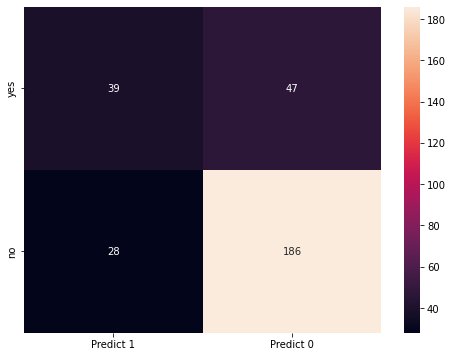

In [62]:
# Confusion Matrix

cm = metrics.confusion_matrix(y_test, predictions, labels=["yes", "no"])

cd_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(cd_cm, annot = True, fmt='g')

In [70]:
# SUPPORT VECTOR MACHINE

from sklearn.svm import SVC 
clf = SVC(kernel = 'rbf', C = 2, gamma = 'auto')
clf.fit(x_train, y_train)
clf.score(x_train, y_train), clf.score(x_test, y_test)

(0.8157142857142857, 0.76)

<AxesSubplot:>

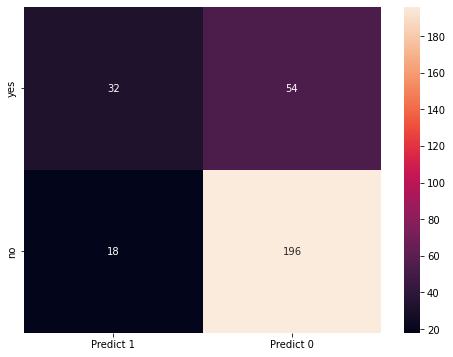

In [137]:
predictions = clf.predict(x_test)
# Confusion Matrix

cm = metrics.confusion_matrix(y_test, predictions, labels=["yes", "no"])

cd_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(cd_cm, annot = True, fmt='g')

In [81]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25, p = 2)
knn.fit(x_train, y_train)
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.7528571428571429, 0.74)

<AxesSubplot:>

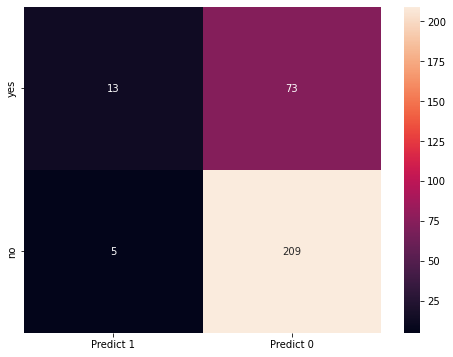

In [138]:
predictions = knn.predict(x_test)
# Confusion Matrix

cm = metrics.confusion_matrix(y_test, predictions, labels=["yes", "no"])

cd_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(cd_cm, annot = True, fmt='g')

In [86]:
# DECISION TREE 

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
dt.fit(x_train, y_train)
dt.score(x_train, y_train), dt.score(x_test, y_test)

(0.7385714285714285, 0.7433333333333333)

<AxesSubplot:>

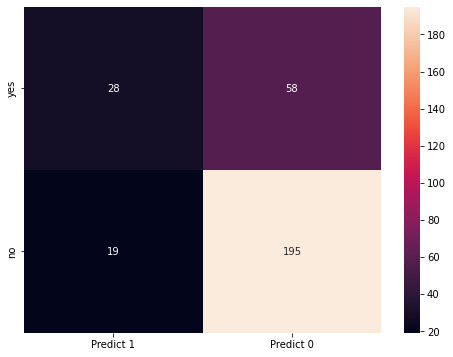

In [139]:
predictions = dt.predict(x_test)
# Confusion Matrix

cm = metrics.confusion_matrix(y_test, predictions, labels=["yes", "no"])

cd_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(cd_cm, annot = True, fmt='g')

In [110]:
# BAGGING CLASSIFIER

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators = 12, base_estimator = dt,
                         max_samples = 55)
bgcl.fit(x_train, y_train)
bgcl.score(x_train, y_train), bgcl.score(x_test, y_test)

(0.76, 0.7466666666666667)

<AxesSubplot:>

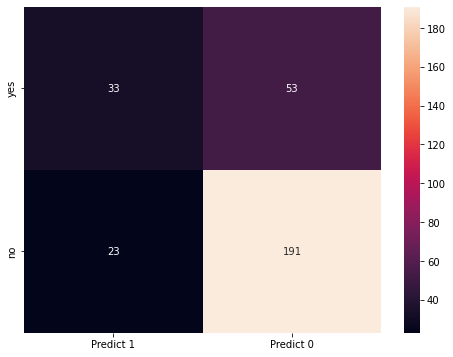

In [141]:
predictions = bgcl.predict(x_test)
# Confusion Matrix

cm = metrics.confusion_matrix(y_test, predictions, labels=["yes", "no"])

cd_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(cd_cm, annot = True, fmt='g')

In [129]:
# ADABOOST CLASSIFIER

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 23)
abc.fit(x_train, y_train)
abc.score(x_train, y_train), abc.score(x_test, y_test)

(0.7871428571428571, 0.75)

<AxesSubplot:>

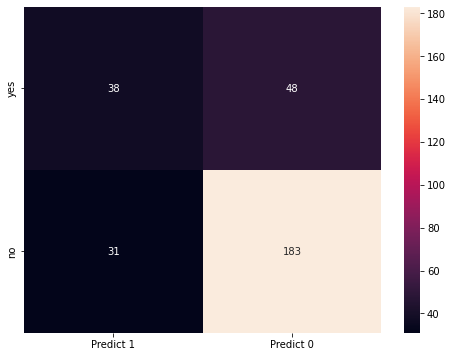

In [142]:
predictions = abc.predict(x_test)
# Confusion Matrix

cm = metrics.confusion_matrix(y_test, predictions, labels=["yes", "no"])

cd_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(cd_cm, annot = True, fmt='g')

In [174]:
# GRADIENT BOOST

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 14, criterion = 'friedman_mse')
gbc.fit(x_train, y_train)
gbc.score(x_train, y_train), gbc.score(x_test, y_test)

(0.7742857142857142, 0.7366666666666667)

<AxesSubplot:>

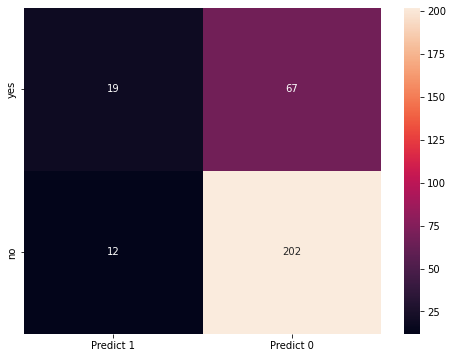

In [175]:
predictions = gbc.predict(x_test)
# Confusion Matrix

cm = metrics.confusion_matrix(y_test, predictions, labels=["yes", "no"])

cd_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(cd_cm, annot = True, fmt='g')

In [234]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'gini', 
                            max_features = 2, max_depth = None, min_samples_split = 27)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train), rfc.score(x_test, y_test)

(0.7714285714285715, 0.72)

<AxesSubplot:>

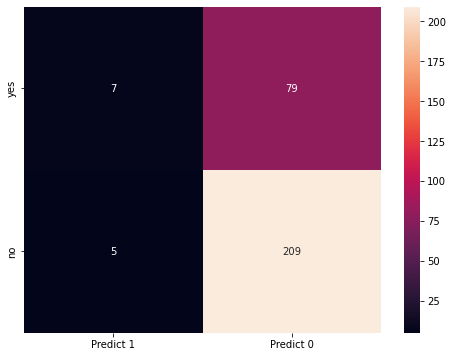

In [235]:
predictions = rfc.predict(x_test)
# Confusion Matrix

cm = metrics.confusion_matrix(y_test, predictions, labels=["yes", "no"])

cd_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (8,6))
sns.heatmap(cd_cm, annot = True, fmt='g')

In [ ]:
'''Upon viewing the score of all the respective models,
   it can be concluded that; Random Boost Classifier, Gradient Boost,
   KNN Classifier, Decision Tree Classifier perform better than
   Logistic Regressor, Adaboost Classifier, Bagging Classifier and SVM.'''